# DRILL - Exploring the Central Limit Theorem

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [3]:
def get_it(pop1,pop2):
    for prop in properties:
        print(prop.__name__.ljust(5),"pop1 => %.3f"%prop(pop1),"pop2 => %.3f"%prop(pop2))


In [4]:
def show_distrib(dist,title):
    plt.hist(dist)
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Population")
    plt.show()
    

In [14]:
pop_size = {}
properties=[np.mean,np.std]
samples = [100,1000,20]

In [15]:
for sample_size in samples:
    pop_size[sample_size] = {}
    pop_size[sample_size]["pop1"] = np.random.binomial(10, 0.2, sample_size)
    pop_size[sample_size]["pop2"] = np.random.binomial(10,0.5, sample_size) 


In [24]:
for sample_size in samples:
    print("==>",sample_size,"      Mean          Std")
    get_it(pop_size[sample_size]["pop1"],pop_size[sample_size]["pop2"])

==> 100       Mean          Std
mean  pop1 => 2.060 pop2 => 5.140
std   pop1 => 1.279 pop2 => 1.371
==> 1000       Mean          Std
mean  pop1 => 2.008 pop2 => 4.988
std   pop1 => 1.238 pop2 => 1.627
==> 20       Mean          Std
mean  pop1 => 2.150 pop2 => 4.600
std   pop1 => 1.314 pop2 => 1.356


Change on the standard deviation varies from sample to sample.
Mean varies but in a lesser extend.

===> pop1
======> 100


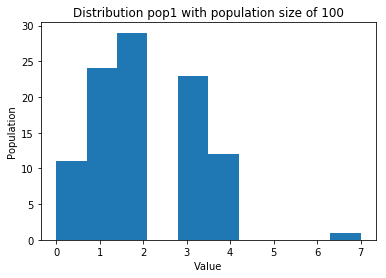

======> 1000


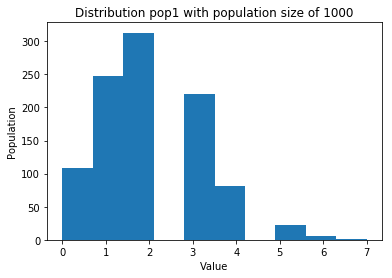

======> 20


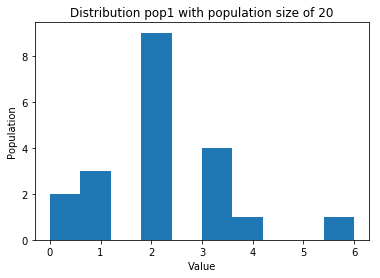

===> pop2
======> 100


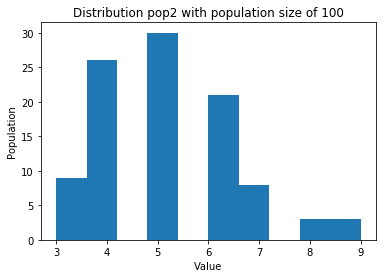

======> 1000


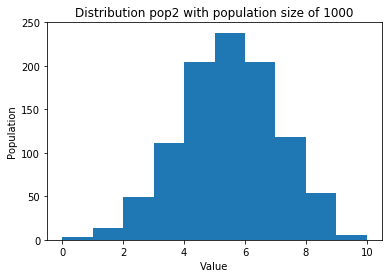

======> 20


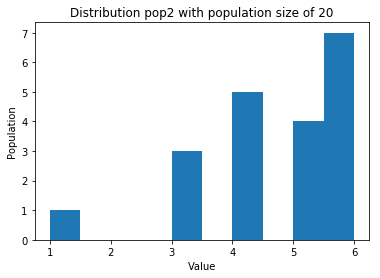

In [17]:


for dist_name in pop_size[samples[0]].keys():
    print("===>",dist_name)
    for sample in samples:
        print("======>",sample)
        show_distrib(pop_size[sample][dist_name],"Distribution %s with population size of %i" %(dist_name,sample))
        

mean  pop1 => 2.150 pop2 => 2.550
std   pop1 => 1.314 pop2 => 1.627
===> pop1
======> 100


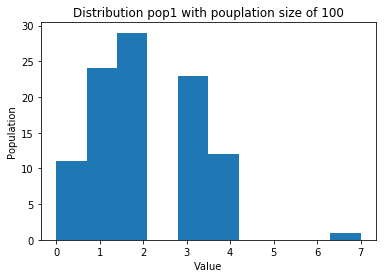

======> 1000


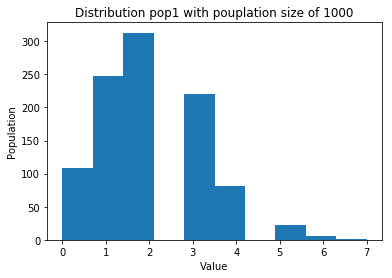

======> 20


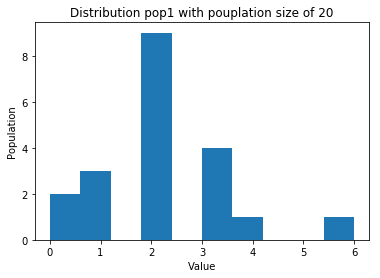

===> pop2
======> 100


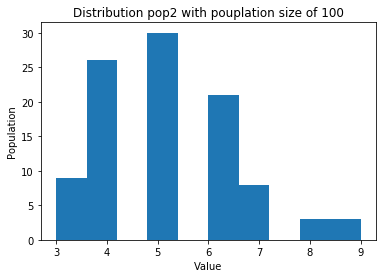

======> 1000


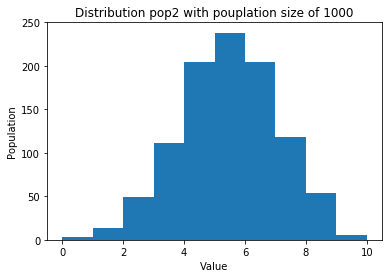

======> 20


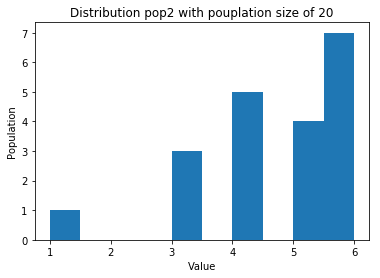

===> pop3
======> 100


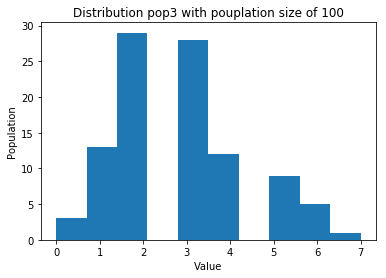

======> 1000


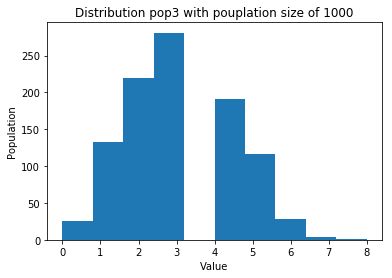

======> 20


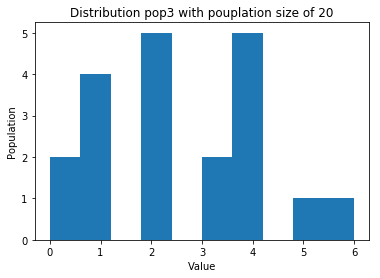

In [27]:
for sample_size in samples:
    pop_size[sample_size]["pop3"] = np.random.binomial(10, 0.3, sample_size)

get_it(pop_size[sample_size]["pop1"],pop_size[sample_size]["pop3"])

for dist_name in pop_size[samples[0]].keys():
    print("===>",dist_name)
    for sample in samples:
        print("======>",sample)
        show_distrib(pop_size[sample][dist_name],"Distribution %s with pouplation size of %i" %(dist_name,sample))
        

In [28]:
print(ttest_ind(pop_size[1000]["pop1"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-46.07036711612062, pvalue=4.53927832945353e-310)


In [29]:
print(ttest_ind(pop_size[1000]["pop3"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-29.676664114105705, pvalue=4.0458023348315303e-160)


In [30]:
pop_size[1000]["pop4"] = np.random.binomial(10,0.4, sample_size) 
print(ttest_ind(pop_size[1000]["pop4"], pop_size[1000]["pop2"], equal_var=False))

Ttest_indResult(statistic=-2.7657025530499526, pvalue=0.012048691422051347)


As the probability gets closer to 0.5, the (absolute ) t-value gets smaller and the p-value gets larger.

In [86]:
distrib = [np.random.gamma, np.random.chisquare]
popfinal = np.random.gamma(1, size=100)
for _ in range(10000):
    parameter = np.random.random_sample()
    the_distrib = np.random.choice(distrib)
    popfinal += the_distrib(parameter, size=100)


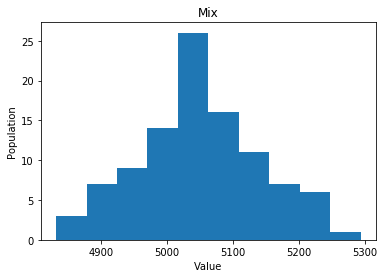

In [87]:
show_distrib(popfinal,"Mix")

In [ ]:
The mean should still represent the population value as long as the sample size is large enough.

In [88]:
np.mean(popfinal)

5048.221519508048